1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

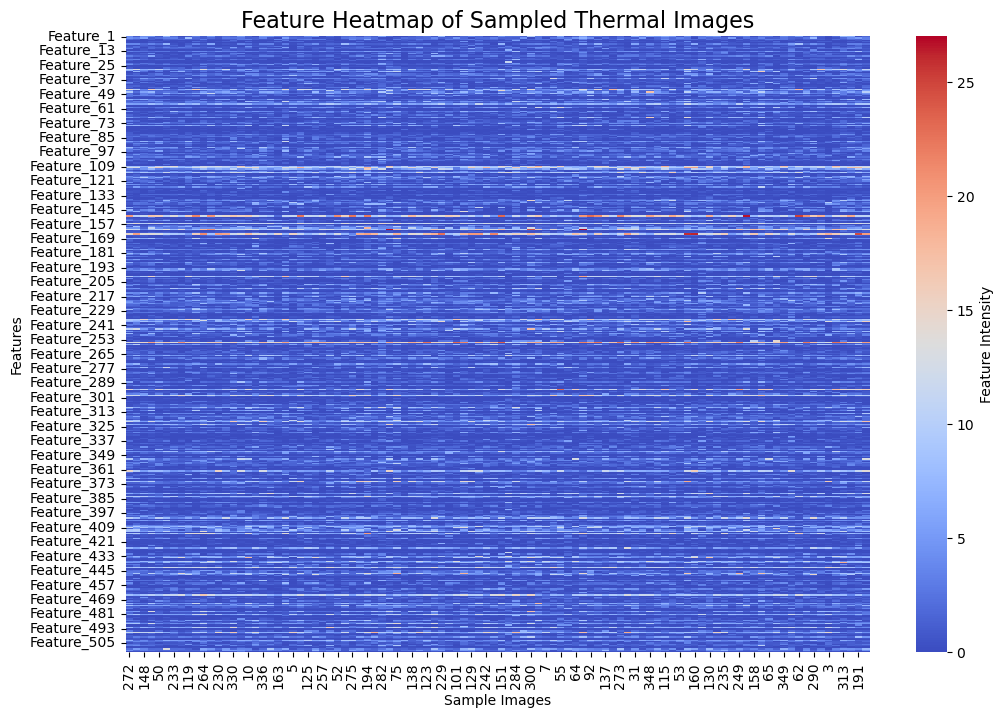

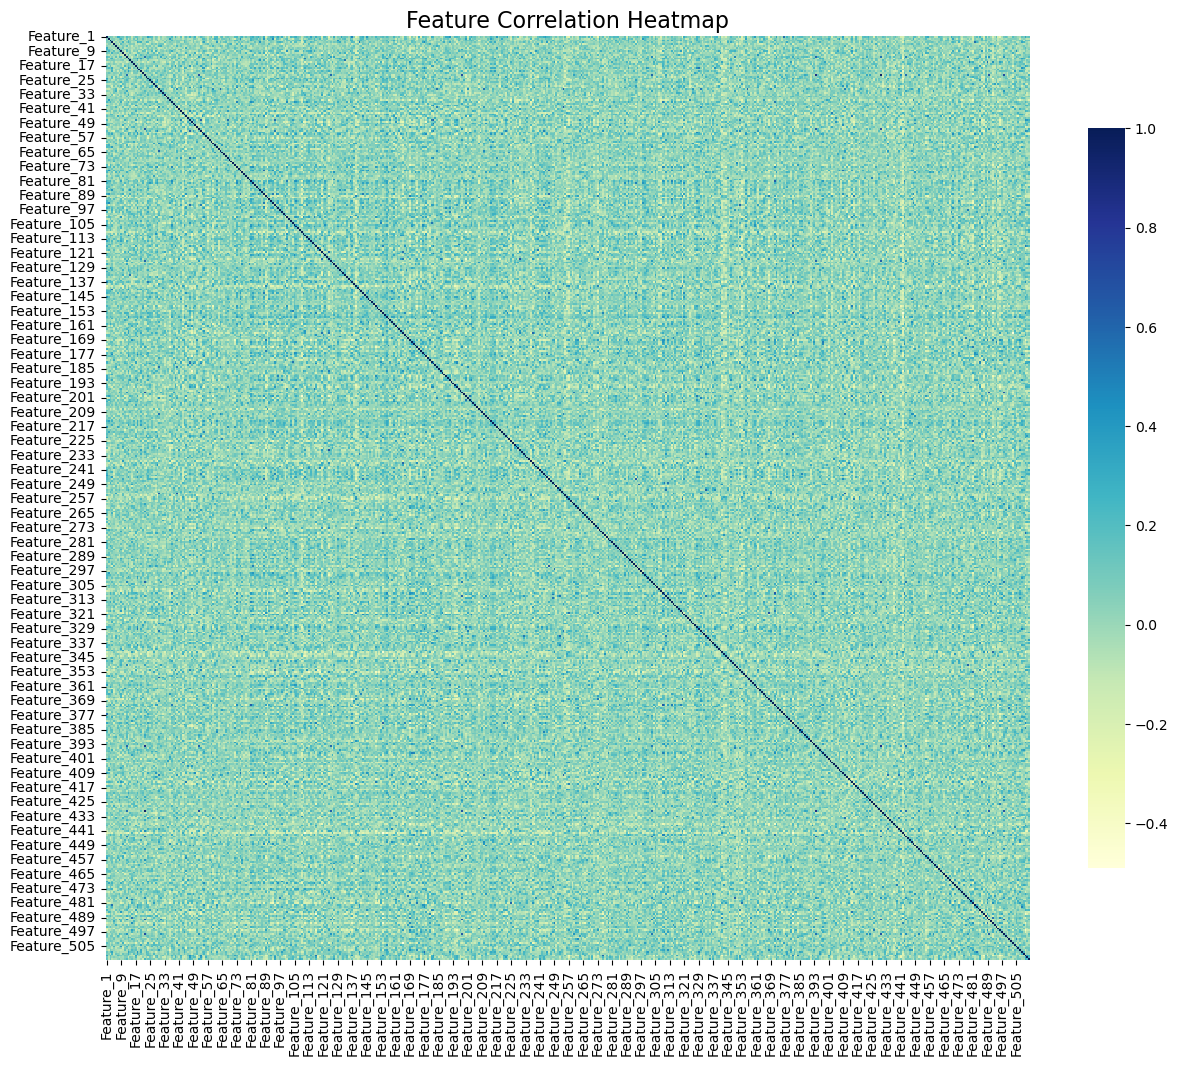

C:\Users\Prajwal\AppData\Local\Temp\ipykernel_7872\4049717680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette="viridis")


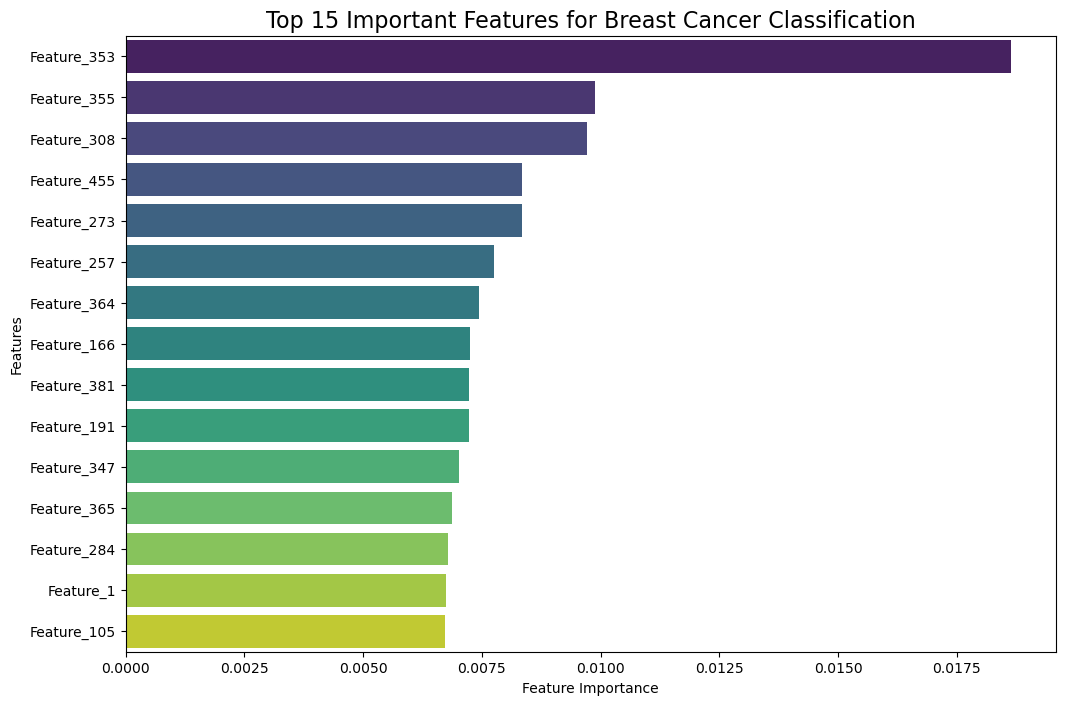

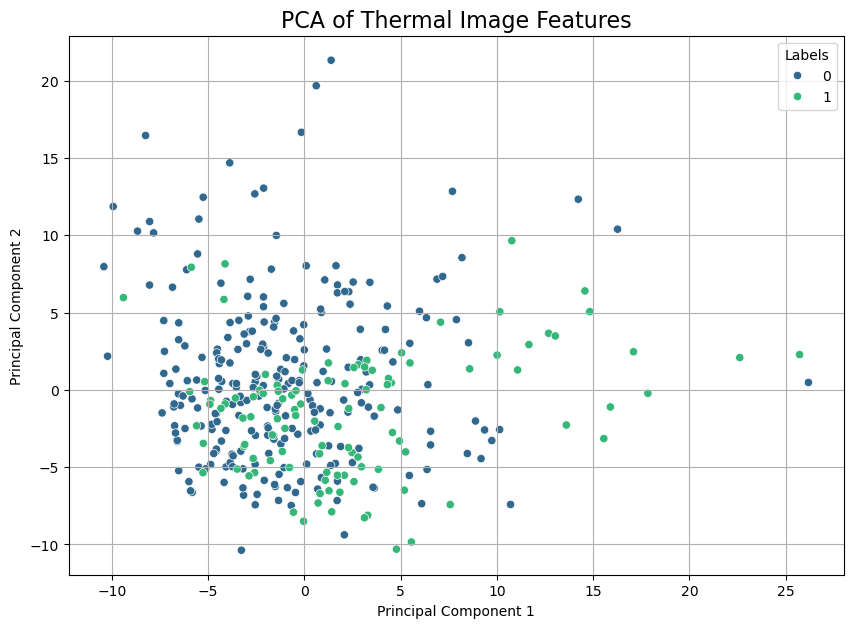

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

# Paths to the dataset
base_path = r'C:\Users\Prajwal\OneDrive\Breast Thermography\Breast Thermography'
benign_path = os.path.join(base_path, 'benign')
malignant_path = os.path.join(base_path, 'malignant')

# Function to get all image files from subfolders
def get_image_files(folder_path):
    all_files = []
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            all_files += [os.path.join(subdir_path, file) for file in os.listdir(subdir_path) 
                          if os.path.splitext(file)[1].lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']]
    return all_files

# Collecting image files for benign and malignant classes
benign_files = get_image_files(benign_path)
malignant_files = get_image_files(malignant_path)

# Model for feature extraction
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features
def extract_features(files, label):
    features = []
    labels = []
    for file in files:
        try:
            img = image.load_img(file, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature.flatten())
            labels.append(label)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    return features, labels

# Extract features and labels
benign_features, benign_labels = extract_features(benign_files, 0)
malignant_features, malignant_labels = extract_features(malignant_files, 1)

# Prepare the DataFrame
features = np.array(benign_features + malignant_features)
labels = np.array(benign_labels + malignant_labels)
features_df = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(features.shape[1])])

# Feature Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features_df.sample(100).T, cmap="coolwarm", cbar_kws={'label': 'Feature Intensity'})
plt.title("Feature Heatmap of Sampled Thermal Images", fontsize=16)
plt.xlabel("Sample Images")
plt.ylabel("Features")
plt.show()

# Feature Correlation Heatmap
correlation_matrix = features_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu", square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# Feature Importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features_df, labels)
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features_df.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette="viridis")
plt.title('Top 15 Important Features for Breast Cancer Classification', fontsize=16)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# PCA for Dimensionality Reduction & Visualization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=["Principal Component 1", "Principal Component 2"])
pca_df['Label'] = labels

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="Principal Component 1", y="Principal Component 2", hue='Label', palette="viridis")
plt.title('PCA of Thermal Image Features', fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Labels")
plt.grid(True)
plt.show()
